In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/yue/Downloads/ClosestFacilitiesNetworkTest_V3.csv'
data2 = pd.read_csv(file_path)
data2

,FacilityID,FacilityRank,Name,IncidentCurbApproach,FacilityCurbApproach,IncidentID,StartTime,EndTime,StartTimeUTC,EndTimeUTC,Total_Length,Total_Time,Shape_Length
0,77,1,2100404460110002 - BATTALION 6/LADDER 3,1,2,1,NaN,NaN,NaN,NaN,1788.005433,3.486025,1788.005739
1,116,1,2100433250140001 - BATTALION 33/ENGINE 276/LAD...,1,2,2,NaN,NaN,NaN,NaN,1550.167678,2.213482,1550.167544
2,71,1,2100411280150003 - ENGINE 264/ENGINE 328/LADDE...,1,1,3,NaN,NaN,NaN,NaN,2573.112949,8.582409,2573.113108
3,54,1,2100416590110004 - ENGINE 84/LADDER 34,1,2,4,NaN,NaN,NaN,NaN,2745.910574,8.838943,2745.910676
4,57,1,2100413490110006 - ENGINE 58/LADDER 26,1,1,5,NaN,NaN,NaN,NaN,384.616542,0.376430,384.616513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615457,177,1,Location 1032942 - ENGINE 282/LADDER 148,1,1,1616057,NaN,NaN,NaN,NaN,891.129355,2.630550,891.129566
1615458,40,1,Location 1032943 - DIVISION 6/ENGINE 71/LADDER 55,2,2,1616058,NaN,NaN,NaN,NaN,1227.772674,6.985869,1227.772684
1615459,119,1,Location 1032944 - ENGINE 233/LADDER 176,2,1,1616059,NaN,NaN,NaN,NaN,3872.993741,5.494090,3872.993689
1615460,176,1,Location 1032945 - BATTALION 37/ENGINE 222,2,2,1616060,NaN,NaN,NaN,NaN,1951.932898,2.456850,1951.932874


In [3]:
data2[['STARFIRE_INCIDENT_ID', 'FACNAME']] = data2['Name'].str.split(' - ', expand=True)
data2.drop(columns=['Name'], inplace=True)
data2.dropna(subset=['Total_Time'], inplace=True)

In [4]:
file_path = '/Users/yue/Downloads/Fire_Incident_Dispatch_Data_With_Loc2020.csv'
data = pd.read_csv(file_path)

/var/folders/6h/bl9x54wx121fkm75nrpjq6t00000gn/T/ipykernel_88213/2414439147.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [5]:
data.index = data.index +1
data.index.name = 'IncidentID'

In [6]:
data3 = pd.merge(data2[['STARFIRE_INCIDENT_ID', 'Total_Time','FACNAME']], data, on='STARFIRE_INCIDENT_ID')

In [7]:
data3 = data3.drop_duplicates()
data3.dropna(subset=['INCIDENT_TRAVEL_TM_SECONDS_QY'], inplace=True)
data3['Difference'] = data3['INCIDENT_TRAVEL_TM_SECONDS_QY'] - data3['Total_Time']
data3

,STARFIRE_INCIDENT_ID,Total_Time,FACNAME,Unnamed: 0,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,...,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,Difference
0,2103640160150311,9.826081,ENGINE 277/LADDER 112,48957,2021-02-05 10:20:00,QUEENS,Q4016,CYPRESS AVE & DECATUR ST,QUEENS,11385.0,...,N,Y,343.0,285.0,1.0,0.0,0.0,40.696220,-73.899870,275.173919
1,2103625420220321,7.019363,BATTALION 26/ENGINE 50/LADDER 19,48959,2021-02-05 10:21:00,BRONX,X2542,BOSTON RD & 166 ST,BRONX,10456.0,...,N,N,775.0,748.0,0.0,1.0,0.0,40.827020,-73.905006,740.980637
2,2103616400140433,5.307433,RESCUE 2,48960,2021-02-05 10:22:00,BROOKLYN,B1640,SUTTER AVE & GRAFTON ST,BROOKLYN,11212.0,...,N,N,272.0,239.0,3.0,4.0,2.0,40.665909,-73.918536,233.692567
3,2103625590120322,9.974867,BATTALION 26/ENGINE 50/LADDER 19,48961,2021-02-05 10:22:00,BRONX,X2559,FOREST AVE & HOME ST,BRONX,10456.0,...,N,Y,504.0,448.0,2.0,1.0,1.0,40.828198,-73.902055,438.025133
4,2103643150250314,5.485379,ENGINE 295/LADDER 144,48962,2021-02-05 10:22:00,QUEENS,Q4315,14 AVE & PARSONS BLVD,QUEENS,11357.0,...,N,Y,262.0,216.0,1.0,1.0,0.0,40.786855,-73.822350,210.514621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501553,2021326450121065,7.996521,ENGINE 96/LADDER 54,871303,2020-07-31 23:57:24,BRONX,X2645,S/B SVC RD BRUCKNER BLVD & METCALF AV,BRONX,10472.0,...,N,Y,352.0,325.0,1.0,1.0,0.0,40.824762,-73.871562,317.003479
501554,2021309480341569,4.320385,BATTALION 57/ENGINE 235,871304,2020-07-31 23:58:27,BROOKLYN,B0948,BROOKLYN AVE & PACIFIC ST,BROOKLYN,11216.0,...,N,N,0.0,0.0,1.0,0.0,0.0,40.677351,-73.944230,-4.320385
501555,2021351490151055,2.035501,BATTALION 51/ENGINE 308,871305,2020-07-31 23:59:29,QUEENS,Q5149,107 AVE & 121 ST,QUEENS,11419.0,...,N,Y,239.0,234.0,1.0,0.0,0.0,40.684891,-73.821470,231.964499
501556,2021316530111601,13.005655,BATTALION 16/ENGINE 69/LADDER 28,871306,2020-07-31 23:59:38,MANHATTAN,M1653,151 ST & MACOMB'S PL,MANHATTAN,10039.0,...,N,Y,304.0,268.0,2.0,2.0,1.0,40.826343,-73.938187,254.994345


<Axes: >

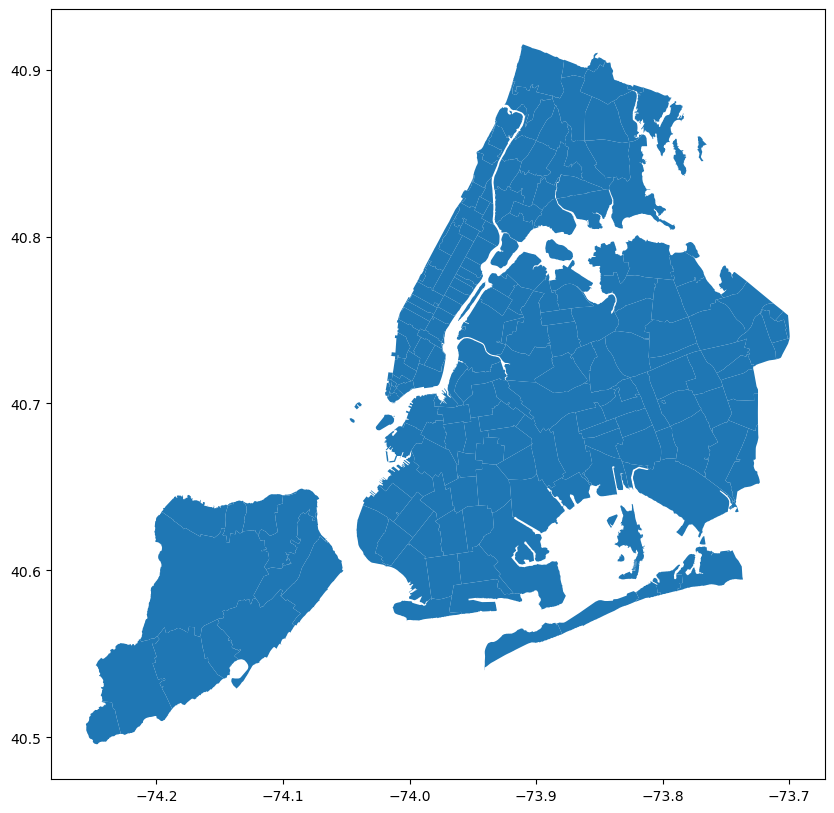

In [8]:
zip_gpd = gpd.read_file("/Users/yue/Downloads/Data/ZIPCODE/ZIP_CODE_040114.shp")

zip_gpd = zip_gpd.to_crs(epsg=4326)
fig, ax = plt.subplots(1, figsize=(10,10))
zip_gpd.plot(ax=ax, k=10, scheme='Quantiles', legend=True)

In [9]:
file_path = '/Users/yue/Downloads/Firehouse.csv'
firehouse = pd.read_csv(file_path)
firehouse

,Unnamed: 0,OBJECTID,FACNAME,ADDRESSNUM,STREETNAME,ADDRESS,CITY,ZIPCODE,BORO,BOROCODE,FACTYPE,FACSUBGRP,FACGROUP,FACDOMAIN,SERVAREA,DATASOUCE,geometry,Latitude,Longitude
0,0,145,ENGINE 5,340,EAST 14 STREET,340 EAST 14 STREET,NEW YORK,10003.0,MANHATTAN,1,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-73.98345385152817 40.73143355214584),40.731434,-73.983454
1,1,158,ENGINE 290/LADDER 103,480,SHEFFIELD AVENUE,480 SHEFFIELD AVENUE,BROOKLYN,11207.0,BROOKLYN,3,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-73.89545388277936 40.66513259466722),40.665133,-73.895454
2,2,352,BATTALION 2/ENGINE 24/LADDER 5,227,SIXTH AVENUE,227 SIXTH AVENUE,NEW YORK,10014.0,MANHATTAN,1,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-74.00342220385416 40.728057045334786),40.728057,-74.003422
3,3,445,ENGINE 284/LADDER 149,1157,79 STREET,1157 79 STREET,BROOKLYN,11228.0,BROOKLYN,3,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-74.01252873187622 40.61995485067439),40.619955,-74.012529
4,4,510,ENGINE 311/LADDER 158,145-50,SPRINGFIELD BOULEVARD,145-50 SPRINGFIELD BOULEVARD,SPRINGFIELD GARDENS,11413.0,QUEENS,4,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-73.75984048995757 40.6635835302823),40.663584,-73.759840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,214,29866,ENGINE 158,65,HARBOR ROAD,65 HARBOR ROAD,STATEN ISLAND,10303.0,STATEN ISLAND,5,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-74.15995587531363 40.63527195418276),40.635272,-74.159956
215,215,30381,ENGINE 206,1201,GRAND STREET,1201 GRAND STREET,BROOKLYN,11211.0,BROOKLYN,3,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-73.9282099099902 40.715328215336534),40.715328,-73.928210
216,216,30500,ENGINE 301/LADDER 150,91-04,197 STREET,91-04 197 STREET,HOLLIS,11423.0,QUEENS,4,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-73.76303978416188 40.714501333959525),40.714501,-73.763040
217,217,30519,ENGINE 310/LADDER 174,5105,SNYDER AVENUE,5105 SNYDER AVENUE,BROOKLYN,11203.0,BROOKLYN,3,FIREHOUSE,FIRE SERVICES,EMERGENCY SERVICES,"PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINIS...",Local,fdny_firehouses,POINT (-73.92890427187021 40.65043161990586),40.650432,-73.928904


In [10]:
merged_data = pd.merge(firehouse[['FACNAME', 'Latitude','Longitude','OBJECTID']], 
                data3, 
                on='FACNAME',  
                how='inner', 
                suffixes=('_firehouse', '_'))
merged_data

,FACNAME,Latitude,Longitude,OBJECTID,STARFIRE_INCIDENT_ID,Total_Time,Unnamed: 0,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,...,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,Difference
0,ENGINE 5,40.731434,-73.983454,145,2103604500110538,12.710216,49050,2021-02-05 11:18:00,MANHATTAN,M0450,...,N,Y,508.0,428.0,0.0,1.0,0.0,40.725288,-73.977977,415.289784
1,ENGINE 5,40.731434,-73.983454,145,2103604700110619,0.851301,49183,2021-02-05 12:50:00,MANHATTAN,M0470,...,N,N,836.0,830.0,1.0,0.0,0.0,40.731350,-73.982556,829.148699
2,ENGINE 5,40.731434,-73.983454,145,2103604510110653,13.957025,49229,2021-02-05 13:19:00,MANHATTAN,M0451,...,N,N,0.0,0.0,1.0,0.0,0.0,40.724877,-73.975164,-13.957025
3,ENGINE 5,40.731434,-73.983454,145,2103604510211038,13.957025,49702,2021-02-05 17:53:00,MANHATTAN,M0451,...,N,N,0.0,0.0,1.0,0.0,0.0,40.724877,-73.975164,-13.957025
4,ENGINE 5,40.731434,-73.983454,145,2103603860111140,15.347393,49825,2021-02-05 19:01:00,MANHATTAN,M0386,...,N,N,0.0,0.0,1.0,0.0,0.0,40.728568,-73.991123,-15.347393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501335,BATTALION 42/ENGINE 243/LADDER 168,40.606057,-74.003468,31111,2021134800140519,5.242305,866957,2020-07-29 13:18:04,BROOKLYN,B3480,...,N,N,0.0,0.0,1.0,0.0,0.0,40.607393,-74.007448,-5.242305
501336,BATTALION 42/ENGINE 243/LADDER 168,40.606057,-74.003468,31111,2021238610140702,6.981359,868727,2020-07-30 14:58:54,BROOKLYN,B3861,...,N,Y,328.0,284.0,2.0,2.0,1.0,40.609683,-73.992975,277.018641
501337,BATTALION 42/ENGINE 243/LADDER 168,40.606057,-74.003468,31111,2021338600140339,3.564968,869714,2020-07-31 03:01:23,BROOKLYN,B3860,...,N,N,0.0,0.0,1.0,0.0,0.0,40.608217,-73.998085,-3.564968
501338,BATTALION 42/ENGINE 243/LADDER 168,40.606057,-74.003468,31111,2021334950141142,6.089630,870690,2020-07-31 16:59:28,BROOKLYN,B3495,...,N,Y,287.0,282.0,1.0,0.0,0.0,40.599249,-74.001433,275.910370


In [11]:
geometry1 = [Point(xy) for xy in zip(merged_data['Longitude'], merged_data['Latitude'])]
geometry2 = [Point(xy) for xy in zip(merged_data['LONGITUDE'], merged_data['LATITUDE'])]

gdf = gpd.GeoDataFrame(merged_data, geometry=geometry1)
gdf['geometry2'] = geometry2

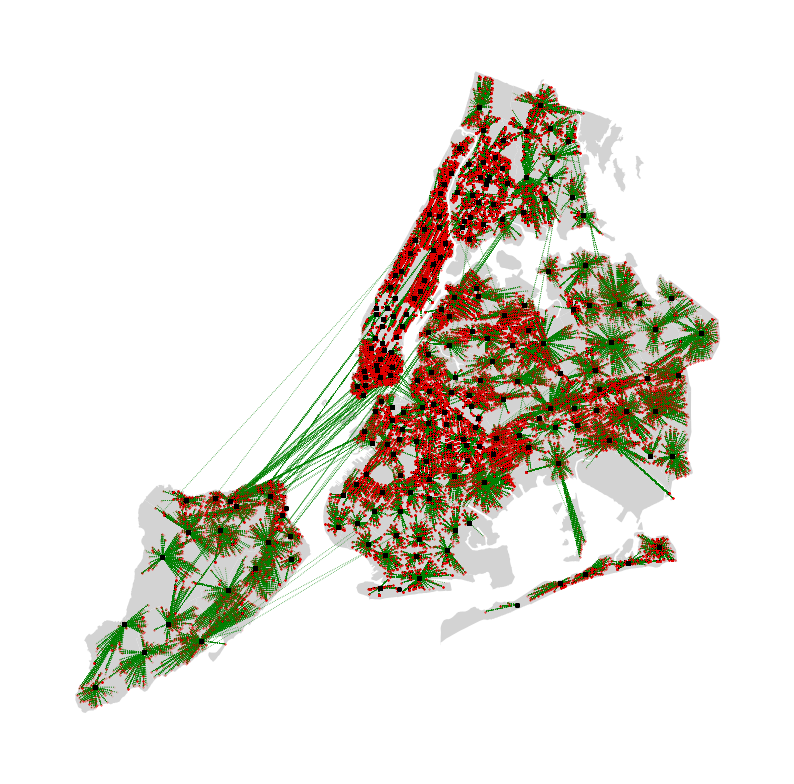

In [12]:
zip_gpd = zip_gpd.to_crs(epsg=4326)
G = nx.Graph()


for i, row in gdf.iterrows():
    alarm_box_node = f"AlarmBox_{i}"
    G.add_node(alarm_box_node, pos=(row['geometry'].x, row['geometry'].y), type='alarm_box')  

for i, row in gdf.iterrows():
    incident_node = f"Incident_{i}"
    G.add_node(incident_node, pos=(row['geometry2'].x, row['geometry2'].y), type='incident')  

for i, row in gdf.iterrows():
    incident_node = f"Incident_{i}"
    alarm_box_node = f"AlarmBox_{i}"
    G.add_edge(alarm_box_node, incident_node)


fig, ax = plt.subplots(1, figsize=(10, 10))
zip_gpd.plot(ax=ax, k=10, scheme='Quantiles', legend=True, facecolor='lightgrey')

pos = nx.get_node_attributes(G, 'pos')

incident_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'incident']
nx.draw_networkx_nodes(G, pos, nodelist=incident_nodes, node_color='red', node_size=0.1, alpha=0.1)

alarm_box_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'alarm_box']
nx.draw_networkx_nodes(G, pos, nodelist=alarm_box_nodes, node_color='black', node_size=5, alpha=0.5)

nx.draw_networkx_edges(G, pos, width=0.5, style='dotted', alpha=1, edge_color='green')  

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.axis('off')

plt.show()

In [13]:
threshold = gdf['Difference'].quantile(0.999)
top_percent = gdf[gdf['Difference'] >= threshold]
top_percent

,FACNAME,Latitude,Longitude,OBJECTID,STARFIRE_INCIDENT_ID,Total_Time,Unnamed: 0,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,...,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,Difference,geometry,geometry2
2462,ENGINE 5,40.731434,-73.983454,145,2026904570111116,6.662620,431641,2020-09-25 17:40:34,MANHATTAN,M0457,...,2050.0,2039.0,2.0,0.0,0.0,40.728446,-73.981789,2032.337380,POINT (-73.98345 40.73143),POINT (-73.98178942 40.72844574)
3237,ENGINE 5,40.731434,-73.983454,145,2033904480111050,2.881798,537988,2020-12-04 18:14:02,MANHATTAN,M0448,...,2589.0,2562.0,0.0,1.0,0.0,40.729186,-73.987250,2559.118202,POINT (-73.98345 40.73143),POINT (-73.98724978 40.72918616)
3250,ENGINE 5,40.731434,-73.983454,145,2035704380110044,9.033457,564825,2020-12-22 01:44:31,MANHATTAN,M0438,...,2266.0,2236.0,0.0,1.0,0.0,40.726053,-73.983535,2226.966543,POINT (-73.98345 40.73143),POINT (-73.98353501 40.72605278)
3410,ENGINE 5,40.731434,-73.983454,145,2000304690110570,6.102498,589058,2020-01-03 11:12:08,MANHATTAN,M0469,...,3261.0,3227.0,0.0,1.0,0.0,40.729433,-73.978027,3220.897502,POINT (-73.98345 40.73143),POINT (-73.97802698 40.72943306)
3454,ENGINE 5,40.731434,-73.983454,145,2000704670211474,10.537532,595374,2020-01-07 20:52:16,MANHATTAN,M0467,...,2197.0,2120.0,0.0,1.0,0.0,40.727749,-73.976180,2109.462468,POINT (-73.98345 40.73143),POINT (-73.97617988 40.7277487)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488366,ENGINE 297/LADDER 130,40.785004,-73.848079,29406,2018445930350356,13.742870,820818,2020-07-02 14:25:16,QUEENS,Q4593,...,4438.0,4417.0,1.0,0.0,0.0,40.778613,-73.840681,4403.257130,POINT (-73.84808 40.78500),POINT (-73.84068128 40.7786131)
489209,BATTALION 16/ENGINE 69/LADDER 28,40.820858,-73.941825,29741,2106916701511070,9.193017,100645,2021-03-10 20:29:00,MANHATTAN,M1670,...,3316.0,3272.0,1.0,1.0,0.0,40.829165,-73.937263,3262.806983,POINT (-73.94183 40.82086),POINT (-73.93726258 40.82916466)
493661,BATTALION 16/ENGINE 69/LADDER 28,40.820858,-73.941825,29741,2015516460110733,7.498040,775829,2020-06-03 16:05:21,MANHATTAN,M1646,...,2225.0,2189.0,0.0,1.0,0.0,40.826002,-73.939438,2181.501960,POINT (-73.94183 40.82086),POINT (-73.93943756 40.82600165)
497426,ENGINE 310/LADDER 174,40.650432,-73.928904,30519,2114323190140354,0.416173,215329,2021-05-23 10:31:00,BROOKLYN,B2319,...,2452.0,2428.0,0.0,1.0,0.0,40.650228,-73.928265,2427.583827,POINT (-73.92890 40.65043),POINT (-73.92826499 40.65022811)


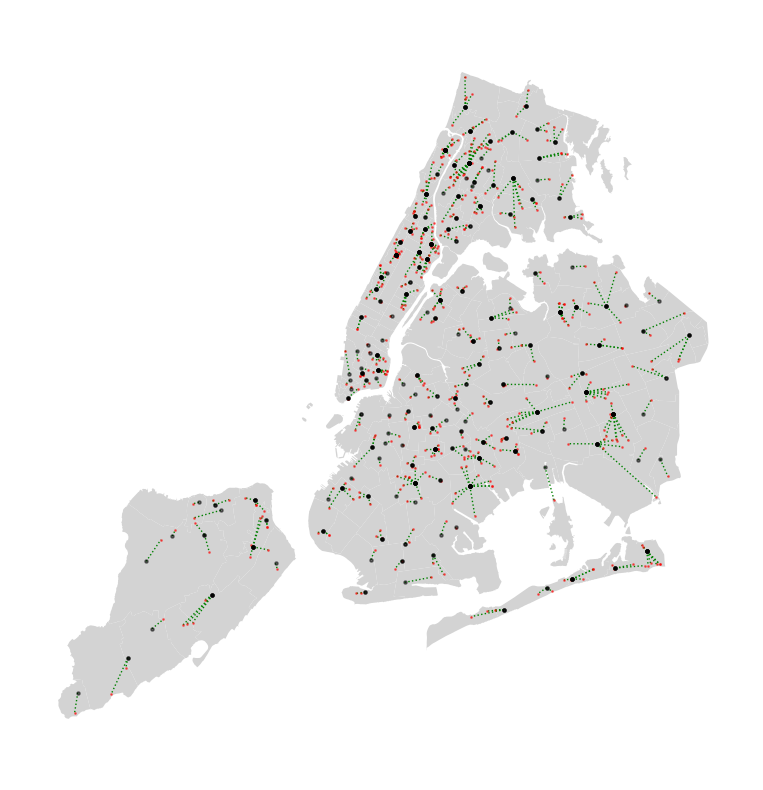

In [14]:
zip_gpd = zip_gpd.to_crs(epsg=4326)
G = nx.Graph()


for i, row in top_percent.iterrows():
    alarm_box_node = f"AlarmBox_{i}"
    G.add_node(alarm_box_node, pos=(row['geometry'].x, row['geometry'].y), type='alarm_box')  

for i, row in top_percent.iterrows():
    incident_node = f"Incident_{i}"
    G.add_node(incident_node, pos=(row['geometry2'].x, row['geometry2'].y), type='incident')  

for i, row in top_percent.iterrows():
    incident_node = f"Incident_{i}"
    alarm_box_node = f"AlarmBox_{i}"
    G.add_edge(alarm_box_node, incident_node)


fig, ax = plt.subplots(1, figsize=(10, 10))
zip_gpd.plot(ax=ax, k=10, scheme='Quantiles', legend=True, facecolor='lightgrey')

pos = nx.get_node_attributes(G, 'pos')

incident_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'incident']
nx.draw_networkx_nodes(G, pos, nodelist=incident_nodes, node_color='red', node_size=1, alpha=0.5)

alarm_box_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'alarm_box']
nx.draw_networkx_nodes(G, pos, nodelist=alarm_box_nodes, node_color='black', node_size=5, alpha=0.5)

nx.draw_networkx_edges(G, pos, width=1, style='dotted', alpha=1, edge_color='green')  

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.axis('off')

plt.show()